601380
iteration 265 : loss 0.599458
iteration 265 : loss 0.619155
iteration 265 : loss 0.615681
iteration 265 : loss 0.581130
iteration 265 : loss 0.586194
iteration 265 : loss 0.595060
iteration 265 : loss 0.603506
iteration 265 : loss 0.591389
iteration 265 : loss 0.593509
iteration 265 : loss 0.578870
iteration 265 : loss 0.576076
iteration 265 : loss 0.591526
iteration 265 : loss 0.584333
iteration 265 : loss 0.584490
iteration 265 : loss 0.562815
iteration 265 : loss 0.597651
iteration 265 : loss 0.616678
iteration 265 : loss 0.619188
iteration 265 : loss 0.612397
iteration 265 : loss 0.587989
iteration 265 : loss 0.598989
iteration 265 : loss 0.600451
iteration 265 : loss 0.601463
iteration 265 : loss 0.597454
iteration 265 : loss 0.596911
iteration 265 : loss 0.590883
iteration 265 : loss 0.599928
iteration 265 : loss 0.601562
iteration 265 : loss 0.603588
iteration 265 : loss 0.621255
iteration 265 : loss 0.600538
iteration 265 : loss 0.603777
iteration 265 : loss 0.612525
ite

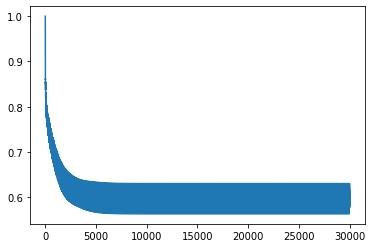

In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
print('x_train:', x_train.shape)

K = len(np.unique(y_train)) # Classes
Ntr = x_train.shape[0]
Nte = x_test.shape[0]
Din = 3072 # CIFAR10
# Din = 784 # MINIST

# Normalize pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0
mean_image = np.mean(x_train, axis=0)
x_train = x_train - mean_image
x_test = x_test - mean_image

y_train = tf.keras.utils.to_categorical(y_train, num_classes=K)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)

x_train = np.reshape(x_train,(Ntr,Din))
x_test = np.reshape(x_test,(Nte,Din))
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

std = 1e-5
H = 200
w1 = std*np.random.randn(Din, H)
b1 = np.zeros(H)
w2 = std*np.random.randn(H, K)
b2 = np.zeros(K)
print("w1:", w1.shape)
print("b1:", b1.shape)
print("w2:", w2.shape)
print("b2:", b2.shape)
batch_size = 500

iterations = 300
print('batch size:' ,batch_size)
lr = 1.45e-2
lr_decay = 0.999
reg = 5e-6
loss_history = []
train_acc_history = []
val_acc_history = []

x_l = x_train * 255

for t in range(iterations):
    for it in range(100):
        indices=np.arange(it * 500 , batch_size + it * 500)
        x = x_l[indices]
        y = y_train[indices]
        h_l = 1.0 / (1.0 + np.exp(-(x.dot(w1) + b1))) 
        y_pre = h_l.dot(w2) + b2
        loss = (1. / batch_size) * np.square(y_pre - y).sum() + reg * (np.sum(w1 * w1) + np.sum(w2 * w2))
        loss_history.append(loss)
        if t % 5 == 0:
            print('iteration %d : loss %f' % (t,loss))

        dl_yp = (1. / batch_size) * 2.0 * (y_pre - y)
        dw2 = h_l.T.dot(dl_yp) + reg * w2
        db2 = dl_yp.sum(axis=0)
        dl_h = dl_yp.dot(w2.T)
        dw1 = x.T.dot(dl_h * h_l * (1 - h_l)) + reg * w1
        db1 = (dl_h * h_l * (1 - h_l)).sum(axis=0)
        w1 -= lr * dw1
        b1 -= lr * db1
        w2 -= lr * dw2
        b2 -= lr * db2
        lr *= lr_decay

plt.plot(loss_history)

x_t = x_train * 255
h_l = 1.0 / (1.0 + np.exp(-(x_t.dot(w1) + b1)))
y_pre = h_l.dot(w2) + b2
train_loss = (1/Ntr) * (np.square(y_train - y_pre)).sum()
print('Training Loss :',train_loss)

acc_check = 0
for i in range(y_train.shape[0]):
    list_pre = y_pre[i].tolist()
    list_train = y_train[i].tolist()
    if list_pre.index(max(list_pre)) == list_train.index(max(list_train)):
        acc_check += 1

train_accuracy = (1/Ntr) * acc_check
print('Training Accuracy :',train_accuracy)

x_t = x_test * 255
h_l = 1.0 / (1.0 + np.exp(-(x_t.dot(w1) + b1)))
y_pre = h_l.dot(w2) + b2
test_loss = (1/Nte) * (np.square(y_test - y_pre)).sum()
print('Testing Loss :',test_loss)

acc_check = 0
for i in range(y_test.shape[0]):
    list_pre = y_pre[i].tolist()
    list_test = y_test[i].tolist()
    if list_pre.index(max(list_pre)) == list_test.index(max(list_test)):
        acc_check += 1

test_accuracy = (1/Nte) * acc_check
print('Testing Accuracy :',test_accuracy)